# YouTube, desktop, нефильтрованные трассы, sd/hd/uhd

In [1]:
import os
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

**Подгружаем таблицу с нашими данными**

In [2]:
data = pd.read_csv('data_unfiltered.csv')
data

,Unnamed: 0,Video_number,Density_burst,Density_throttling,Quality
0,0,1,1.058198e+07,7.784370e+05,2160
1,1,2,1.455325e+07,8.185857e+05,2160
2,2,3,1.446529e+07,1.205208e+06,2160
3,3,4,1.098314e+07,1.508179e+06,2160
4,4,5,5.832415e+06,7.187604e+05,2160
...,...,...,...,...,...
145,145,21,2.051503e+06,4.545315e+04,360
146,146,22,1.284383e+06,3.662261e+04,360
147,147,23,1.070837e+06,2.868816e+04,360
148,148,24,1.415124e+06,3.507011e+04,360


In [3]:
data = data.drop(columns=['Unnamed: 0', 'Video_number'])
data

,Density_burst,Density_throttling,Quality
0,1.058198e+07,7.784370e+05,2160
1,1.455325e+07,8.185857e+05,2160
2,1.446529e+07,1.205208e+06,2160
3,1.098314e+07,1.508179e+06,2160
4,5.832415e+06,7.187604e+05,2160
...,...,...,...
145,2.051503e+06,4.545315e+04,360
146,1.284383e+06,3.662261e+04,360
147,1.070837e+06,2.868816e+04,360
148,1.415124e+06,3.507011e+04,360


In [9]:
quality_sdhd = []
i = 0
for index, row in data.iterrows():
    if row['Quality'] == 2160:
        quality_sdhd.append('UHD')
    elif row['Quality'] >= 720:
        quality_sdhd.append('HD')
    else:
        quality_sdhd.append('SD')
    i += 1
data['Quality_label'] = quality_sdhd
data

,Density_burst,Density_throttling,Quality,Quality_label
0,1.058198e+07,7.784370e+05,2160,UHD
1,1.455325e+07,8.185857e+05,2160,UHD
2,1.446529e+07,1.205208e+06,2160,UHD
3,1.098314e+07,1.508179e+06,2160,UHD
4,5.832415e+06,7.187604e+05,2160,UHD
...,...,...,...,...
145,2.051503e+06,4.545315e+04,360,SD
146,1.284383e+06,3.662261e+04,360,SD
147,1.070837e+06,2.868816e+04,360,SD
148,1.415124e+06,3.507011e+04,360,SD


**Посмотрим на данные наглядно**

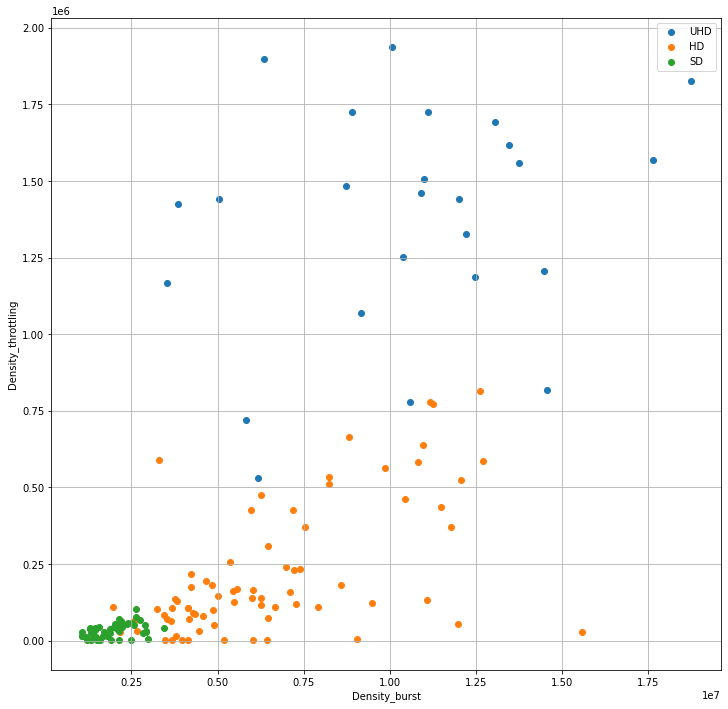

In [11]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(12)

for quality_label in ['UHD', 'HD', 'SD']:
    x = []
    y = []
    for i in range(len(data)):
        if data['Quality_label'][i] == quality_label:
            x.append(data['Density_burst'][i])
            y.append(data['Density_throttling'][i])
    plt.scatter(x, y, label=quality_label)
    
plt.xlabel("Density_burst")
plt.ylabel("Density_throttling")
plt.legend()
plt.grid(True)

plt.show()

**Перемешаем строки**

In [12]:
data_shuffled = shuffle(data)
data_shuffled

,Density_burst,Density_throttling,Quality,Quality_label
111,2.581793e+06,5.062330e+04,480,SD
22,9.156464e+06,1.067831e+06,2160,UHD
18,1.006864e+07,1.936806e+06,2160,UHD
48,9.858794e+06,5.637265e+05,1440,HD
43,1.261641e+07,8.151056e+05,1440,HD
...,...,...,...,...
116,2.145144e+06,7.089120e+04,480,SD
126,1.219965e+06,1.976430e+03,360,SD
67,8.587694e+06,1.814241e+05,1080,HD
72,4.148921e+06,1.066066e+05,1080,HD


**Пробуем обычный KNN**

In [13]:
X = data_shuffled[['Density_burst', 'Density_throttling']]
y = data_shuffled['Quality_label']

best_score = 0.0
i_best_score = 0
for i in range(1, 30):
    model = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(model, X, y, cv=10, scoring = 'accuracy')
    n_spaces = 1 - i // 10
    print(i, ' ' * n_spaces, scores.mean())
    if (scores.mean() > best_score):
        best_score = scores.mean()
        i_best_score = i

print("\nЛучший резульат:\nn =", i_best_score, "\naccuracy =", best_score)

1   0.8666666666666668
2   0.8533333333333335
3   0.9333333333333333
4   0.8733333333333333
5   0.8800000000000001
6   0.8666666666666668
7   0.8733333333333334
8   0.86
9   0.8666666666666668
10  0.8600000000000001
11  0.8666666666666668
12  0.8466666666666667
13  0.86
14  0.8333333333333333
15  0.8533333333333333
16  0.8133333333333332
17  0.8333333333333334
18  0.8333333333333334
19  0.8133333333333332
20  0.8
21  0.8066666666666666
22  0.8066666666666666
23  0.82
24  0.7933333333333333
25  0.8333333333333334
26  0.8
27  0.8200000000000001
28  0.8
29  0.82

Лучший резульат:
n = 3 
accuracy = 0.9333333333333333


**Нужно нормализовать данные**

In [14]:
data_norm = data_shuffled.copy()

for column in ['Density_burst', 'Density_throttling']:
    data_norm[column] = ((data_norm[column] - data_norm[column].min()) /
                            (data_norm[column].max() - data_norm[column].min()))
    
data_norm

,Density_burst,Density_throttling,Quality,Quality_label
111,0.086025,0.025610,480,SD
22,0.458092,0.551093,2160,UHD
18,0.509713,1.000000,2160,UHD
48,0.497838,0.290676,1440,HD
43,0.653894,0.420537,1440,HD
...,...,...,...,...
116,0.061315,0.036080,480,SD
126,0.008958,0.000479,360,SD
67,0.425905,0.093181,1080,HD
72,0.174711,0.054530,1080,HD


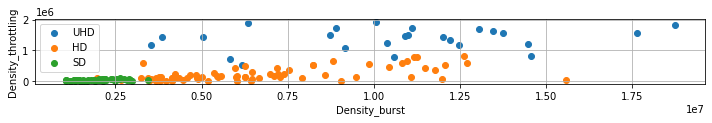

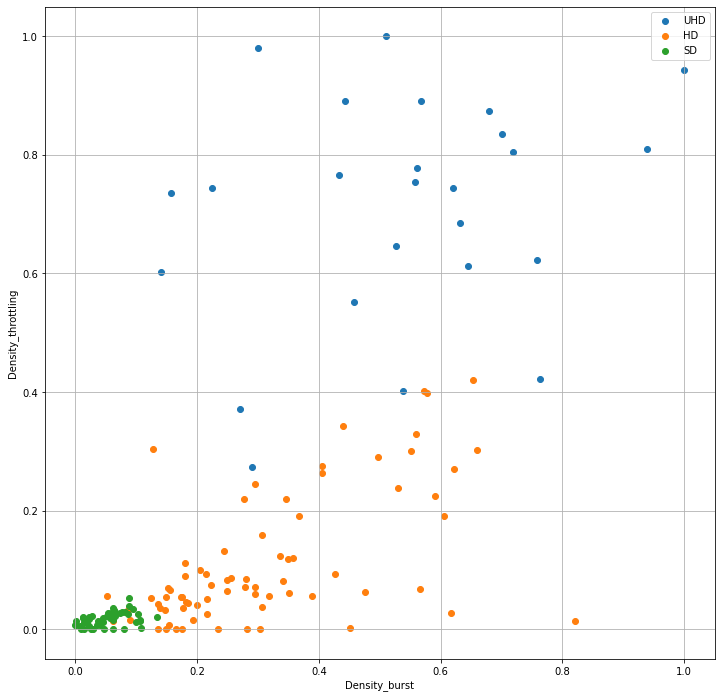

In [16]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(1.2)

for quality_label in ['UHD', 'HD', 'SD']:
    x = []
    y = []
    for i in range(len(data)):
        if data['Quality_label'][i] == quality_label:
            x.append(data['Density_burst'][i])
            y.append(data['Density_throttling'][i])
    plt.scatter(x, y, label=quality_label)
    
plt.xlabel("Density_burst")
plt.ylabel("Density_throttling")
plt.legend()
plt.grid(True)

plt.show()

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(12)

for quality_label in ['UHD', 'HD', 'SD']:
    x = []
    y = []
    for i in range(len(data_norm)):
        if data['Quality_label'][i] == quality_label:
            x.append(data_norm['Density_burst'][i])
            y.append(data_norm['Density_throttling'][i])
    plt.scatter(x, y, label=quality_label)
    
plt.xlabel("Density_burst")
plt.ylabel("Density_throttling")
plt.legend()
plt.grid(True)

plt.show()

*По графикам можно понять отличие работы классификаторов с нормализацией и без*

**Снова пробуем KNN, но теперь с нормализованными данными**

In [17]:
X = data_norm[['Density_burst', 'Density_throttling']]
y = data_norm['Quality_label']

best_score = 0.0
i_best_score = 0
for i in range(1, 30):
    model = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(model, X, y, cv=10, scoring = 'accuracy')
    n_spaces = 1 - i // 10
    print(i, ' ' * n_spaces, scores.mean())
    if (scores.mean() > best_score):
        best_score = scores.mean()
        i_best_score = i

print("\nЛучший резульат:\nn =", i_best_score, "\naccuracy =", best_score)

1   0.9
2   0.8866666666666665
3   0.9200000000000002
4   0.9266666666666667
5   0.9400000000000001
6   0.9400000000000001
7   0.9400000000000001
8   0.9400000000000001
9   0.9400000000000001
10  0.9400000000000001
11  0.9333333333333333
12  0.9400000000000001
13  0.9333333333333333
14  0.9333333333333333
15  0.9333333333333333
16  0.9333333333333333
17  0.9333333333333333
18  0.9333333333333333
19  0.9333333333333333
20  0.9333333333333333
21  0.9333333333333333
22  0.9333333333333333
23  0.9333333333333333
24  0.9333333333333333
25  0.9266666666666667
26  0.9333333333333333
27  0.9333333333333333
28  0.9333333333333333
29  0.9333333333333333

Лучший резульат:
n = 5 
accuracy = 0.9400000000000001


*По сравнению с ненормированным KNN точность увеличилась — 0.94 против 0.93

**Пробуем Support Vector Classification**

In [18]:
best_score = 0.0
best_kernel = ''
for i_kernel in (['linear', 'poly', 'rbf', 'sigmoid']):
    X_norm = data_norm[['Density_burst', 'Density_throttling']]
    y_norm = data_norm['Quality_label']
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel=i_kernel))
    scores = cross_val_score(clf, X_norm, y_norm, cv=10, scoring = 'accuracy')
    n_spaces = 8 - len(i_kernel)
    print('kernel:', i_kernel, ' ' * n_spaces, 'scores_mean:', scores.mean())
    if (scores.mean() > best_score):
        best_score = scores.mean()
        best_kernel = i_kernel
        
print("\nЛучший резульат:\nkernel = ", best_kernel, "\naccuracy = ", best_score)

kernel: linear    scores_mean: 0.9400000000000001
kernel: poly      scores_mean: 0.9333333333333333
kernel: rbf       scores_mean: 0.9400000000000001
kernel: sigmoid   scores_mean: 0.7466666666666667

Лучший резульат:
kernel =  linear 
accuracy =  0.9400000000000001


*Результат тот же*

**Пробуем CatBoost**

In [19]:
best_score = 0.0
best_params = []
for iter_param in ([100, 200, 500, 1000, 2000]):
    for cv_param in ([5, 10, 20]):
        for lr_param in ([0.05, 0.2, 0.5, 0.7, 1]):
            model = CatBoostClassifier(iterations=iter_param, learning_rate = lr_param, silent=True)
            scores = cross_val_score(model, X, y, cv=cv_param, scoring = 'accuracy')
            n_spaces_i = 1 - iter_param // 1000
            n_spaces_j = 1 - cv_param // 10
            n_spaces_k = 5 - len(str(lr_param))
            print('iterations:', iter_param, ' ' * n_spaces_i,
                  'cv:', cv_param, ' ' * n_spaces_j,
                  'learning_rate:', lr_param,' ' * n_spaces_k,
                  'scores_mean:', scores.mean())
            if (scores.mean() > best_score):
                best_score = scores.mean()
                best_params = [iter_param, cv_param, lr_param]

print("\nЛучший резульат:",
      "\niterations = ", best_params[0],
      "\ncv = ", best_params[1],
      "\nlearning_rate = ", best_params[2],
      "\naccuracy = ", best_score, sep = "")

iterations: 100   cv: 5   learning_rate: 0.05   scores_mean: 0.9066666666666666
iterations: 100   cv: 5   learning_rate: 0.2    scores_mean: 0.9
iterations: 100   cv: 5   learning_rate: 0.5    scores_mean: 0.9
iterations: 100   cv: 5   learning_rate: 0.7    scores_mean: 0.9066666666666666
iterations: 100   cv: 5   learning_rate: 1      scores_mean: 0.9066666666666666
iterations: 100   cv: 10  learning_rate: 0.05   scores_mean: 0.9200000000000002
iterations: 100   cv: 10  learning_rate: 0.2    scores_mean: 0.9066666666666668
iterations: 100   cv: 10  learning_rate: 0.5    scores_mean: 0.9066666666666668
iterations: 100   cv: 10  learning_rate: 0.7    scores_mean: 0.8866666666666667
iterations: 100   cv: 10  learning_rate: 1      scores_mean: 0.9000000000000001
iterations: 100   cv: 20  learning_rate: 0.05   scores_mean: 0.9330357142857144
iterations: 100   cv: 20  learning_rate: 0.2    scores_mean: 0.9133928571428571
iterations: 100   cv: 20  learning_rate: 0.5    scores_mean: 0.91875
i

*Получили результат, чуть худший, чем для KNN и SVM*